In [3]:
from model import *
from data import *

Using TensorFlow backend.


In [6]:
data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
myGene = trainGenerator(2,'datasets/data1/train','image','label',data_gen_args,save_to_dir = 'datasets/data1/train/aug',
                        target_size = (256,256),image_color_mode = 'rgb')
model = unetNorm(input_size = (256,256,3))
model_checkpoint = ModelCheckpoint('models/unet_lung1_data1.hdf5', monitor='loss',verbose=1, save_best_only=True)
model.fit_generator(myGene,steps_per_epoch=200,epochs=20,callbacks=[model_checkpoint])

Epoch 1/20
Found 310 images belonging to 1 classes.
Found 310 images belonging to 1 classes.
200/200 [==============================] - 1563s 8s/step - loss: 0.6811 - acc: 0.8644

Epoch 00001: loss improved from inf to 0.68107, saving model to unet_lung1_data1.hdf5
Epoch 2/20
200/200 [==============================] - 1532s 8s/step - loss: 0.6310 - acc: 0.9131

Epoch 00002: loss improved from 0.68107 to 0.63097, saving model to unet_lung1_data1.hdf5
Epoch 3/20
200/200 [==============================] - 1518s 8s/step - loss: 0.5950 - acc: 0.9428

Epoch 00003: loss improved from 0.63097 to 0.59501, saving model to unet_lung1_data1.hdf5
Epoch 4/20
200/200 [==============================] - 1523s 8s/step - loss: 0.5644 - acc: 0.9523

Epoch 00004: loss improved from 0.59501 to 0.56443, saving model to unet_lung1_data1.hdf5
Epoch 5/20
200/200 [==============================] - 1533s 8s/step - loss: 0.5372 - acc: 0.9607

Epoch 00005: loss improved from 0.56443 to 0.53715, saving model to unet

In [8]:
#Train on aug data
imgs_train,imgs_mask_train = geneTrainNpy("datasets/data1/train/aug/","datasets/data1/train/aug/")
model.fit(imgs_train, imgs_mask_train, batch_size=2, nb_epoch=10, verbose=1,validation_split=0.2, shuffle=True, callbacks=[model_checkpoint])

/home/nbuser/.anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Train on 145 samples, validate on 37 samples
Epoch 1/10
145/145 [==============================] - 1528s 11s/step - loss: 0.6875 - acc: 0.9907 - val_loss: 0.6852 - val_acc: 0.9895

Epoch 00001: loss improved from 0.69044 to 0.68752, saving model to unet_lung1.hdf5
Epoch 2/10
145/145 [==============================] - 1509s 10s/step - loss: 0.6839 - acc: 0.9907 - val_loss: 0.6825 - val_acc: 0.9895

Epoch 00002: loss improved from 0.68752 to 0.68390, saving model to unet_lung1.hdf5
Epoch 3/10
145/145 [==============================] - 1495s 10s/step - loss: 0.6804 - acc: 0.9907 - val_loss: 0.6788 - val_acc: 0.9895

Epoch 00003: loss improved from 0.68390 to 0.68038, saving model to unet_lung1.hdf5
Epoch 4/10
145/145 [==============================] - 1532s 11s/step - loss: 0.6769 - acc: 0.9907 - val_loss: 0.6751 - val_acc: 0.9895

Epoch 00004: loss improved from 0.68038 to 0.67690, saving model to unet_lung1.hdf5
Epoch 5/10
145/145 [==============================] - 1542s 11s/step - loss

KeyboardInterrupt: 

In [7]:
testGene = testGenerator("datasets/data1/test/image",target_size = (256,256),as_gray = False,
                        flag_multi_class = True)
model = unetNorm(input_size = (256,256,3))
model.load_weights("models/unet_lung1_data1.hdf5")
results = model.predict_generator(testGene,30,verbose=1)
saveResult("datasets/data1/test/label",results)

30/30 [==============================] - 37s 1s/step


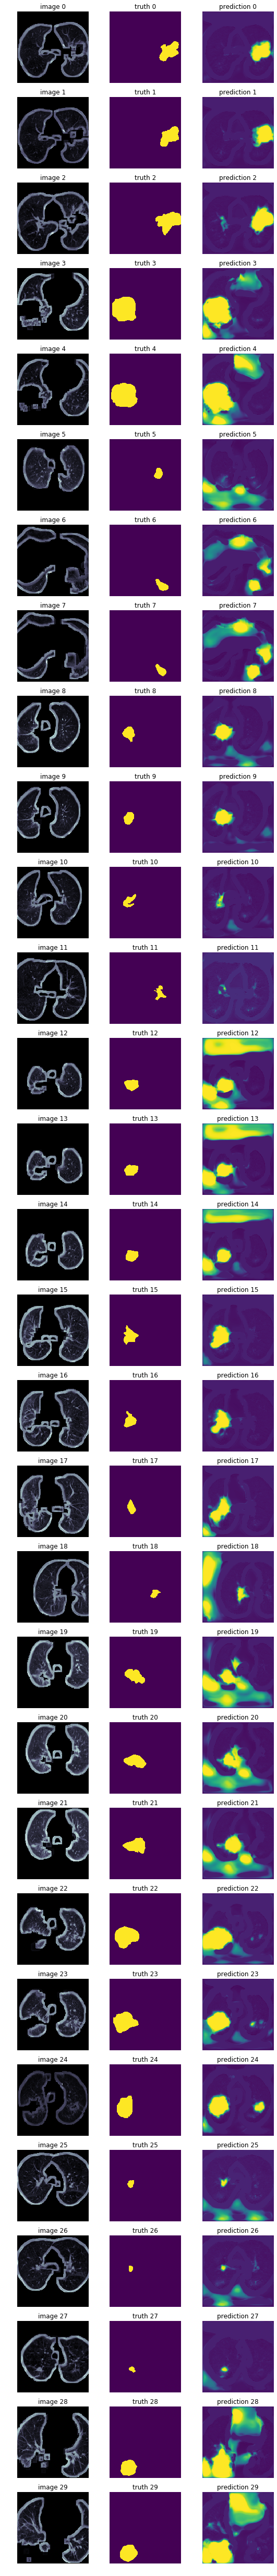

In [9]:
plotResults("data1/test/image/","data1/test/label/","data1/test/label/")